In [1]:
import pandas as pd
import altair as alt
import numpy as np

In [2]:
alt.data_transformers.disable_max_rows()
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
#Investment data
start_val = 5000
savings_interest_rate = 7
savings_int = 1+ savings_interest_rate/100

## Mortgage data
pricipal = 250000
mortgage_payments = 1000
annual_mort_payments = mortgage_payments*12
mortgage_interest_rate = 2.5
mortgage_int = 1+ mortgage_interest_rate/100

#Other values
monthyly_savings = 500
yearly_savings = monthyly_savings*12
mort_to_invest = True

invest_start_yr = 0


data = pd.DataFrame(
    {'year': [],
     'type': [],
     'value': []
    }
)

data.loc[0] = [0, 'Investments value', start_val]
data.loc[1] = [0, 'Total contributed', start_val]
data.loc[2] = [0, 'Mortgage Value', pricipal]
data.loc[3] = [0, 'Mortgage Payments', 0]
data.loc[4] = [0, 'Investments value (overpay)', start_val]
data.loc[5] = [0, 'Total contributed (overpay)', start_val]
data.loc[6] = [0, 'Mortgage Value (overpay)', pricipal]
data.loc[7] = [0, 'Mortgage Payments (overpay)', 0]

data

,year,type,value
0,0.0,Investments value,5000.0
1,0.0,Total contributed,5000.0
2,0.0,Mortgage Value,250000.0
3,0.0,Mortgage Payments,0.0
4,0.0,Investments value (overpay),5000.0
5,0.0,Total contributed (overpay),5000.0
6,0.0,Mortgage Value (overpay),250000.0
7,0.0,Mortgage Payments (overpay),0.0


In [4]:
years = 35


for y in range(1, years+1):    
    
    temp = pd.DataFrame(
        {'year': [],
         'type': [],
         'value': []
        }
    )    

    # Investment only values.
    
    last_total_val = data[(data['year'] == y-1) & (data['type'] == 'Investments value')]['value']
    last_mort_val = data[(data['year'] == y-1) & (data['type'] == 'Mortgage Value')]['value']  

    mortgage_fin = data[(data['type'] == 'Mortgage Value') & (data['value'] <= 0)]['year'].min()
    
    if last_mort_val.values[0] <= 0:
        mort_multi = y-mortgage_fin
        temp.loc[0] = [y, 'Investments value', (last_total_val.values[0] + yearly_savings + annual_mort_payments) * savings_int]
        temp.loc[1] = [y, 'Total contributed', (start_val + yearly_savings*y) + (annual_mort_payments*(mort_multi))]           
        temp.loc[2] = [y, 'Mortgage Value', 0]
        temp.loc[3] = [y, 'Mortgage Payments', data[data['type'] == 'Mortgage Payments'].max()[2]]    

    else:            
        temp.loc[0] = [y, 'Investments value', (last_total_val.values[0] + yearly_savings) * savings_int]
        temp.loc[1] = [y, 'Total contributed', (start_val + yearly_savings*y)]            
        temp.loc[2] = [y, 'Mortgage Value', (last_mort_val.values[0] - annual_mort_payments) * mortgage_int]
        temp.loc[3] = [y, 'Mortgage Payments', (annual_mort_payments)*y]
        
    # Overpayment values.
    
    overpay_last_total_val = data[(data['year'] == y-1) & (data['type'] == 'Investments value (overpay)')]['value']
    overpay_last_mort_val = data[(data['year'] == y-1) & (data['type'] == 'Mortgage Value (overpay)')]['value']  

    overpay_mortgage_fin = data[(data['type'] == 'Mortgage Value (overpay)') & (data['value'] <= 0)]['year'].min()
    
    # Invests only the mortgage payments AND the overpayments.
    if overpay_last_mort_val.values[0] <= 0 and mort_to_invest is True:
        mort_multi = y-overpay_mortgage_fin
        temp.loc[4] = [y, 'Investments value (overpay)', (overpay_last_total_val.values[0] + yearly_savings + annual_mort_payments) * savings_int]
        temp.loc[5] = [y, 'Total contributed (overpay)', start_val + (yearly_savings*mort_multi) + (annual_mort_payments*mort_multi)]           
        temp.loc[6] = [y, 'Mortgage Value (overpay)', 0]
        temp.loc[7] = [y, 'Mortgage Payments (overpay)', data[data['type'] == 'Mortgage Payments (overpay)'].max()[2]]
        
    # Invests only the mortgage payments and not the overpayments.        
    elif overpay_last_mort_val.values[0] <= 0 and mort_to_invest is False:
        mort_multi = y-overpay_mortgage_fin
        temp.loc[4] = [y, 'Investments value (overpay)', (overpay_last_total_val.values[0] + annual_mort_payments) * savings_int]
        temp.loc[5] = [y, 'Total contributed (overpay)', start_val + (annual_mort_payments*mort_multi)]           
        temp.loc[6] = [y, 'Mortgage Value (overpay)', 0]
        temp.loc[7] = [y, 'Mortgage Payments (overpay)', data[data['type'] == 'Mortgage Payments (overpay)'].max()[2]]    
    
    # Pays off mortgage with the mortgage payment and savings amount.
    else:            
        temp.loc[4] = [y, 'Investments value (overpay)', (overpay_last_total_val.values[0]) * savings_int]
        temp.loc[5] = [y, 'Total contributed (overpay)', (start_val)]            
        temp.loc[6] = [y, 'Mortgage Value (overpay)', (overpay_last_mort_val.values[0] - annual_mort_payments - yearly_savings) * mortgage_int]
        temp.loc[7] = [y, 'Mortgage Payments (overpay)', (annual_mort_payments + yearly_savings)*y]
    
    
    data = data.append(temp)  
    #print(temp)

#data
    

In [5]:
mortgage_paid_overpay = data[(data['type'] == 'Mortgage Payments (overpay)') & (data['year'] == 35)]['value'].values[0]
mortgage_paid = data[(data['type'] == 'Mortgage Payments') & (data['year'] == 35)]['value'].values[0]

invested_overpay = data[(data['type'] == 'Total contributed (overpay)') & (data['year'] == 35)]['value'].values[0]
invested = data[(data['type'] == 'Total contributed') & (data['year'] == 35)]['value'].values[0]

print("Total paid (overpaid) = ", (mortgage_paid_overpay + invested_overpay))
print("Total paid = ", (mortgage_paid + invested))

invested_return_overpay = round(data[(data['type'] == 'Investments value (overpay)') & (data['year'] == 35)]['value'].values[0], 2)
invested_return = round(data[(data['type'] == 'Investments value') & (data['year'] == 35)]['value'].values[0], 2)

print("Total assets (overpaid) = ", (250000 + invested_return_overpay))
print("Total assets (overpaid) = ", (250000 + invested_return))
print("Difference in asset value = ", (invested_return-invested_return_overpay))

Total paid (overpaid) =  635000.0
Total paid =  635000.0
Total assets (overpaid) =  958204.27
Total assets (overpaid) =  1282711.92
Difference in asset value =  324507.65


In [6]:
sorted(data['type'].unique().tolist())

['Investments value',
 'Investments value (overpay)',
 'Mortgage Payments',
 'Mortgage Payments (overpay)',
 'Mortgage Value',
 'Mortgage Value (overpay)',
 'Total contributed',
 'Total contributed (overpay)']

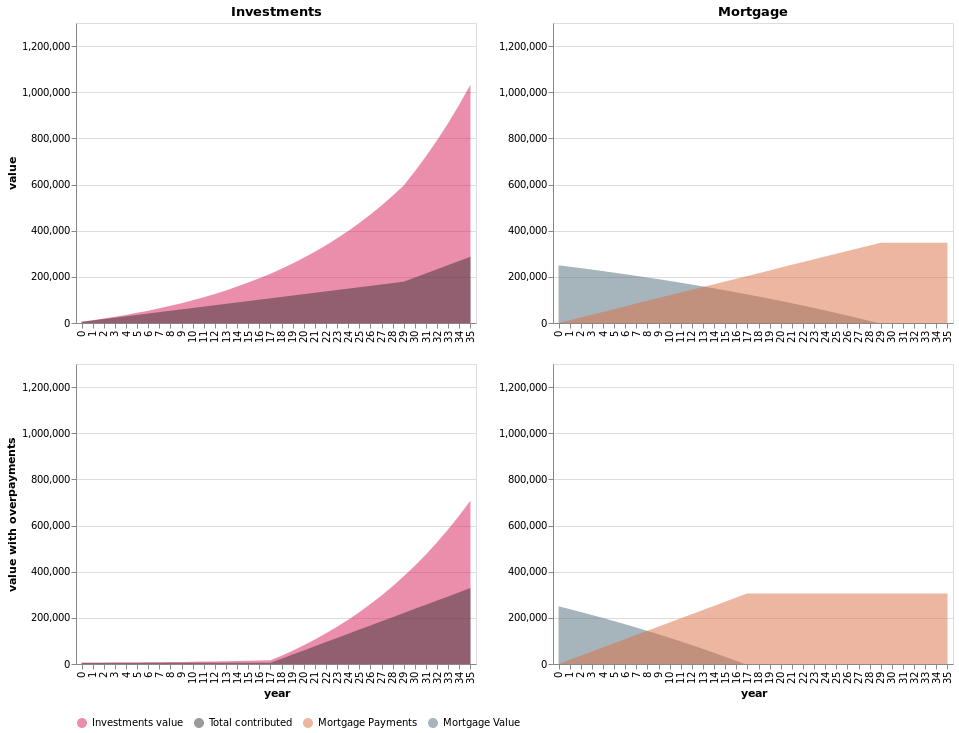

In [7]:
max_val = np.ceil(data[data['year'] == 35]['value'].max()/250000)
y_max_value = 250000*max_val

legend_vals = ['Investments value', 'Total contributed', 'Mortgage Payments', 'Mortgage Value', ]


domain = sorted(data['type'].unique().tolist())
# range_ = ['#66ffcc', 'magenta', '#99ccff', '#ff9966', '#66ffcc', 'magenta', '#99ccff', '#ff9966']
range_ = ['#d81e5b', '#d81e5b', '#dd6e42', '#dd6e42', '#4f6d7a', '#4f6d7a', '#3a3335', '#3a3335', ]
col_vals = alt.Color('type:N', scale=alt.Scale(domain=domain, range=range_), 
                    legend = alt.Legend(orient="bottom", title=None, values=legend_vals )
                   )

opacity_val = 0.5

investments = alt.Chart(data.reset_index()).mark_area(opacity=opacity_val).encode(
    x = alt.X("year:N", title=''), 
    y = alt.Y("value:Q", stack=None, scale=alt.Scale(domain=(0, y_max_value)), title='value'),
    color = col_vals
).transform_filter(
    alt.FieldOneOfPredicate(field='type', oneOf=['Investments value', 'Total contributed'])
).properties(
height=300,
width=400,
title='Investments'
)

mortgage = alt.Chart(data.reset_index()).mark_area(opacity=opacity_val).encode(
    x=alt.X("year:N", title=''),
    y=alt.Y("value:Q", stack=None, scale=alt.Scale(domain=(0, y_max_value)), title=''),
    color = col_vals

).transform_filter(
    alt.FieldOneOfPredicate(field='type', oneOf=['Mortgage Value', 'Mortgage Payments'])
).properties(
height=300,
width=400,
title='Mortgage'
)

overpay_investments = alt.Chart(data.reset_index()).mark_area(opacity=opacity_val).encode(
    x=alt.X("year:N"), 
    y=alt.Y("value:Q", stack=None, scale=alt.Scale(domain=(0, y_max_value)), title='value with overpayments'),
    color = col_vals
).transform_filter(
    alt.FieldOneOfPredicate(field='type', oneOf=['Investments value (overpay)', 'Total contributed (overpay)'])
).properties(
height=300,
width=400
)

overpay_mortgage = alt.Chart(data.reset_index()).mark_area(opacity=opacity_val).encode(
    x="year:N",
    y=alt.Y("value:Q", stack=None, scale=alt.Scale(domain=(0, y_max_value)), title=''),
    color = col_vals
).transform_filter(
    alt.FieldOneOfPredicate(field='type', oneOf=['Mortgage Value (overpay)', 'Mortgage Payments (overpay)'])
).properties(
height=300,
width=400
)

final = ((investments | mortgage) & (overpay_investments | overpay_mortgage))
final.save('final_test.json')
final

#TODO add in titles
# sort the legend.
# Harmonise colours. 

# mark_area(
#     color="lightblue",
#     interpolate='step-after',
#     line=True

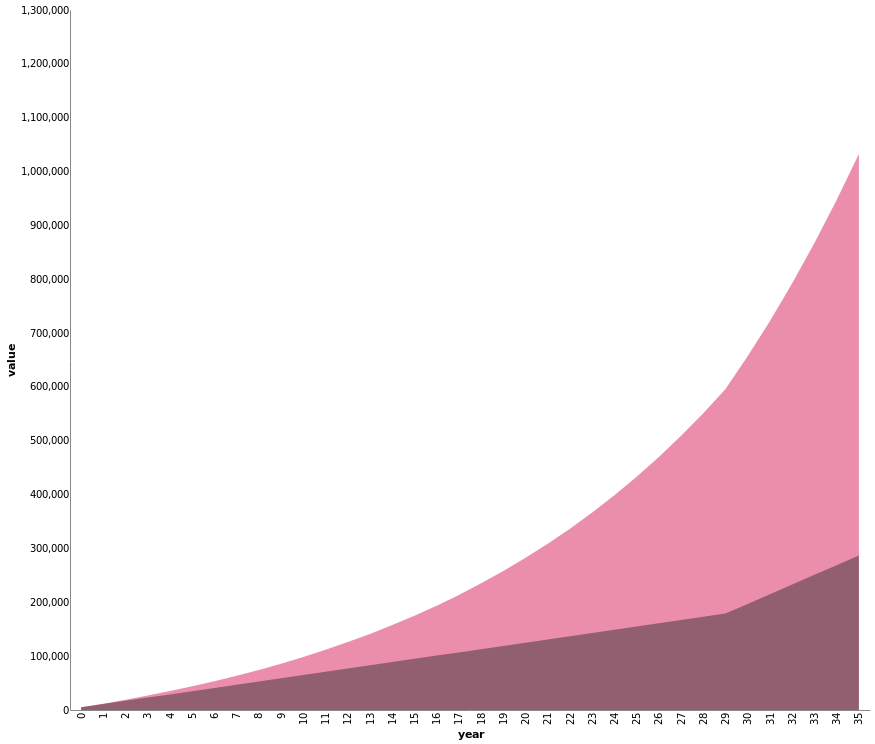

In [10]:
domain1 = ['Investments value', 'Total contributed']
# range_ = ['#66ffcc', 'magenta', '#99ccff', '#ff9966', '#66ffcc', 'magenta', '#99ccff', '#ff9966']
range1_ = ['#d81e5b', '#3a3335', ]

investments1 = alt.Chart(data.reset_index()).mark_area(opacity=opacity_val).encode(
    x=alt.X("year:N", title='year'), 
    y=alt.Y("value:Q", stack=None, scale=alt.Scale(domain=(0, y_max_value)), title='value'),
    color=alt.Color('type:N', scale=alt.Scale(domain=domain, range=range_), legend=None),
).transform_filter(
    alt.FieldOneOfPredicate(field='type', oneOf=['Investments value', 'Total contributed'])
).properties(
height=700,
width=800,
#title='Investments'
).configure_axis(
    grid=False,
    #labels=False,
    ticks=False

).configure_view(
    strokeWidth=0
)

investments1.encode(color=alt.Color('type:N', scale=alt.Scale(domain=domain, range=range_), legend=None))
investments1

In [138]:
data

type_dict = {'Investments value' : 'I',
             'Total contributed' : 'I',
             'Mortgage Value' : 'M',
             'Mortgage Payments' : 'M',
             'Investments value (overpay)' : 'IO',
             'Total contributed (overpay)' : 'IO',
             'Mortgage Value (overpay)' : 'MO',
             'Mortgage Payments (overpay)' : 'MO',            
}

pay_dict = {'Investments value' : 'V',
             'Total contributed' : 'P',
             'Mortgage Value' : 'V',
             'Mortgage Payments' : 'P',
             'Investments value (overpay)' : 'V',
             'Total contributed (overpay)' : 'P',
             'Mortgage Value (overpay)' : 'V',
             'Mortgage Payments (overpay)' : 'P',            
}

data['master_type']= data['type'].map(type_dict)
data['master_pay']= data['type'].map(pay_dict)

data

,year,type,value,master_type,master_pay
0,0.0,Investments value,5.000000e+03,I,V
1,0.0,Total contributed,5.000000e+03,I,P
2,0.0,Mortgage Value,2.500000e+05,M,V
3,0.0,Mortgage Payments,0.000000e+00,M,P
4,0.0,Investments value (overpay),5.000000e+03,IO,V
5,0.0,Total contributed (overpay),5.000000e+03,IO,P
6,0.0,Mortgage Value (overpay),2.500000e+05,MO,V
7,0.0,Mortgage Payments (overpay),0.000000e+00,MO,P
0,1.0,Investments value,1.177000e+04,I,V
1,1.0,Total contributed,1.100000e+04,I,P


In [9]:
final.save('final_test.json')

In [148]:
alt.Chart(data).mark_area(opacity=0.3).encode(
    x='year:N',
    y=alt.Y(
        'value:Q',
        title='Value',
    )
).transform_filter(
    alt.FieldOneOfPredicate(field='master_pay', oneOf=['P', 'V'])
).facet(
    facet='master_type:N'
).properties(
    columns=2,
    width=200,
    height=200
)

SchemaValidationError: Invalid specification

        altair.vegalite.v3.api.Chart, validating 'required'

        'data' is a required property
        

FacetChart({
  columns: 2,
  data:     year                         type         value master_type master_pay
  0    0.0            Investments value  5.000000e+03           I          V
  1    0.0            Total contributed  5.000000e+03           I          P
  2    0.0               Mortgage Value  2.500000e+05           M          V
  3    0.0            Mortgage Payments  0.000000e+00           M          P
  4    0.0  Investments value (overpay)  5.000000e+03          IO          V
  5    0.0  Total contributed (overpay)  5.000000e+03          IO          P
  6    0.0     Mortgage Value (overpay)  2.500000e+05          MO          V
  7    0.0  Mortgage Payments (overpay)  0.000000e+00          MO          P
  0    1.0            Investments value  1.177000e+04           I          V
  1    1.0            Total contributed  1.100000e+04           I          P
  2    1.0               Mortgage Value  2.439500e+05           M          V
  3    1.0            Mortgage Payments  1.

In [ ]:
np.random.seed(42)

# Generating Data
source = pd.DataFrame({
    'Trial A': np.random.normal(0, 0.8, 1000),
    'Trial B': np.random.normal(-2, 1, 1000),
    'Trial C': np.random.normal(3, 2, 1000)
})

alt.Chart(source).transform_fold(
    ['Trial A', 'Trial B', 'Trial C'],
    as_=['Experiment', 'Measurement']
).mark_area(
    opacity=0.3,
    interpolate='step'
).encode(
    alt.X('Measurement:Q', bin=alt.Bin(maxbins=100)),
    alt.Y('count()', stack=None),
    alt.Color('Experiment:N')
)